<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [2]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [4]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [5]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns
%matplotlib inline



Plot the histogram for the column `ConvertedComp`.


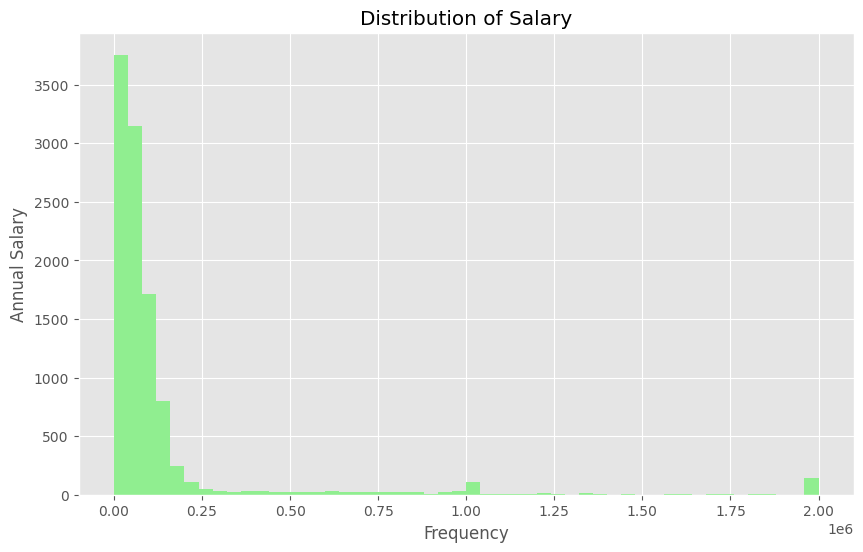

In [47]:

plt.figure(figsize=(10, 6))
# Using plt.hist to create the histogram
# Setting the number of bins to 20 for better visualization
#plt.hist(x=df['ConvertedComp'], bins=20,color = 'lightgreen')
#plt.xlabel('Annual Salary)')
#plt.ylabel('Count')
#plt.title('Histogram of  Salary Distribution')
#plt.show()


df['ConvertedComp'].hist(bins = 50, color = 'lightgreen', grid = True)
 #Labels and title
plt.ylabel('Annual Salary')
plt.xlabel('Frequency')
plt.title('Distribution of Salary')

plt.show()


What is the median of the column `ConvertedComp`?


In [13]:
# your code goes here
sal_median = df['ConvertedComp'].median()
sal_median

57745.0

How many responders identified themselves only as a **Man**?


In [18]:
# your code goes here
gender_cat = df['Gender'].value_counts().to_frame()
gender_cat

,Gender
Man,10480
Woman,731
"Non-binary, genderqueer, or gender non-conforming",63
"Man;Non-binary, genderqueer, or gender non-conforming",26
"Woman;Non-binary, genderqueer, or gender non-conforming",14
Woman;Man,9
"Woman;Man;Non-binary, genderqueer, or gender non-conforming",2


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [48]:
# your code goes here
#woman = pd.DataFrame(df['Gender'] == 'Woman')
#woman.head()
mean_gender = df.groupby(['Gender'])['ConvertedComp'].median().to_frame()

mean_gender

,ConvertedComp
Gender,
Man,57744.0
"Man;Non-binary, genderqueer, or gender non-conforming",59520.0
"Non-binary, genderqueer, or gender non-conforming",67142.0
Woman,57708.0
Woman;Man,21648.0
"Woman;Man;Non-binary, genderqueer, or gender non-conforming",30244.0
"Woman;Non-binary, genderqueer, or gender non-conforming",65535.5


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [22]:
# your code goes here
df['Age'].describe().to_frame()

,Age
count,11111.000000
mean,30.778895
std,7.393686
min,16.000000
25%,25.000000
50%,29.000000
75%,35.000000
max,99.000000


Plot a histogram of the column `Age`.


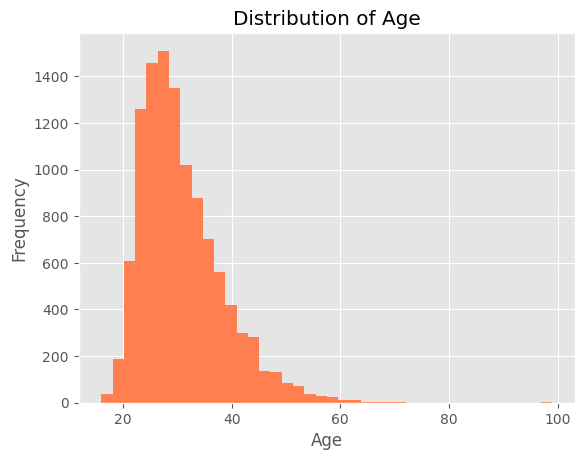

In [70]:
# your code goes here
df['Age'].hist(bins = 40, color = 'coral', grid = True)
# Labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


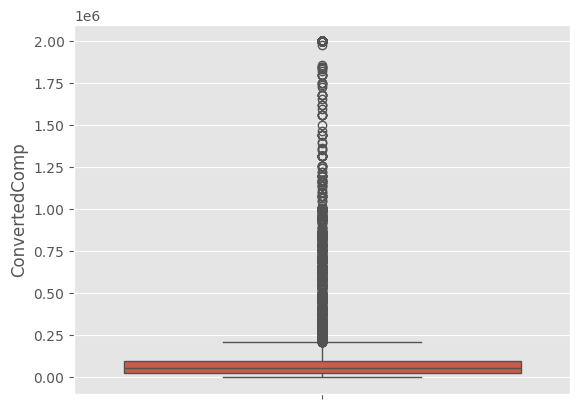

In [37]:
# your code goes here
# Import Libraries


#Plot
sns.boxplot(df["ConvertedComp"])
plt.show()

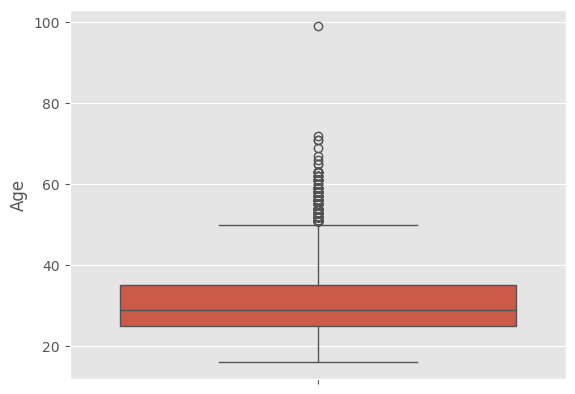

In [86]:
# your code goes here
# Import Libraries


#Plot
sns.boxplot(df["Age"])
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [56]:
# your code goes here
#calculate interquartile range 
#q3, q1 = np.percentile(df['ConvertedComp'], [75 ,25])
#iqr = q3 - q1

#display interquartile range 
#print(iqr)

Q1 = (df['ConvertedComp']).quantile(0.25)
Q3 = (df['ConvertedComp']).quantile(0.75)
IQR = Q3 -Q1

print('Q1: ',Q1,'Q3 : ' ,Q3, 'IQR : ', IQR)

Q1:  26868.0 Q3 :  100000.0 IQR :  73132.0


Find out the upper and lower bounds.


In [57]:
# your code goes here
lower_bound = Q1 - (1.5 * IQR)
higher_bound = Q3 + (1.5 * IQR)

print('Lower bound is : ',lower_bound,'Higher bound is :', higher_bound)

Lower bound is :  -82830.0 Higher bound is : 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [65]:
# your code goes here
outliers = df['ConvertedComp'][(df['ConvertedComp']<lower_bound) | (df['ConvertedComp']>higher_bound)]
print('number of outliers: ' + str(len(outliers)))

print('max outlier value: ' + str(outliers.max()))

print('min outlier value: ' + str(outliers.min()))

number of outliers: 879
max outlier value: 2000000.0
min outlier value: 209892.0


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [90]:
# your code goes here
non_outliers = df['ConvertedComp'][~((df['ConvertedComp']<lower_bound)) | (df['ConvertedComp']>higher_bound)]
outliers_dropped = outliers.dropna().reset_index()
non_outliers.to_frame()


,ConvertedComp
0,61000.0
1,95179.0
2,90000.0
3,455352.0
4,65277.0
...,...
11393,130000.0
11394,19880.0
11395,105000.0
11396,80371.0


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [69]:
# your code goes here
df.corr()

<ipython-input-69-2278162ba8b1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.105386,0.036518,-0.020469,1.000000


In [82]:
# your code goes here
salary_median = non_outliers.median()
salary_median

57745.0

In [89]:
# your code goes here
salary_avg = non_outliers.mean()
salary_avg

131596.7316197316

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
